# ROMS Bio Fennel Model
-This program read, plot, and analyze Bio_Fennel model results from Regional Ocean Modeling System (ROMS).
* calculates and Plots fluxes

- by Amin Ilia Oct 2019

In [1]:
# Import libs
import netCDF4 as nc

import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
# read model outputs in netcdf
data=nc.Dataset('roms_his_wi2.nc','r')   # model history file
d_dia=nc.Dataset('roms_dia_wi2.nc','r')   # model qck file 

In [3]:
for i in data.variables:   # Check varibles in hsr file
    print(i, data.variables[i].shape, data.variables[i].dimensions)

ntimes () ()
ndtfast () ()
dt () ()
dtfast () ()
dstart () ()
nHIS () ()
ndefHIS () ()
nRST () ()
ntsAVG () ()
nAVG () ()
ndefAVG () ()
ntsDIA () ()
nDIA () ()
ndefDIA () ()
Falpha () ()
Fbeta () ()
Fgamma () ()
Akt_bak (14,) ('tracer',)
Akv_bak () ()
rdrg () ()
rdrg2 () ()
Zob () ()
Zos () ()
Znudg () ()
M2nudg () ()
M3nudg () ()
Tnudg (14,) ('tracer',)
rho0 () ()
gamma2 () ()
LuvSrc () ()
LwSrc () ()
LtracerSrc (14,) ('tracer',)
LsshCLM () ()
Lm2CLM () ()
Lm3CLM () ()
LtracerCLM (14,) ('tracer',)
LnudgeM2CLM () ()
LnudgeM3CLM () ()
LnudgeTCLM (14,) ('tracer',)
BioIter () ()
AttSW () ()
AttChl () ()
PARfrac () ()
Vp0 () ()
I_thNH4 () ()
D_p5NH4 () ()
NitriR () ()
K_NO3 () ()
K_NH4 () ()
K_Phy () ()
Chl2C_m () ()
ChlMin () ()
PhyCN () ()
PhyIP () ()
PhyIS () ()
PhyMin () ()
PhyMR () ()
ZooAE_N () ()
ZooBM () ()
ZooCN () ()
ZooER () ()
ZooGR () ()
ZooMin () ()
ZooMR () ()
LDeRRN () ()
LDeRRC () ()
CoagR () ()
SDeRRN () ()
SDeRRC () ()
wPhy () ()
wLDet () ()
wSDet () ()
pCO2air () ()
sph

In [4]:
for i in d_dia.variables: # Check varibles in qck file
    print(i, d_dia.variables[i].shape, d_dia.variables[i].dimensions)

ntimes () ()
ndtfast () ()
dt () ()
dtfast () ()
dstart () ()
nHIS () ()
ndefHIS () ()
nRST () ()
ntsAVG () ()
nAVG () ()
ndefAVG () ()
ntsDIA () ()
nDIA () ()
ndefDIA () ()
Falpha () ()
Fbeta () ()
Fgamma () ()
Akt_bak (14,) ('tracer',)
Akv_bak () ()
rdrg () ()
rdrg2 () ()
Zob () ()
Zos () ()
Znudg () ()
M2nudg () ()
M3nudg () ()
Tnudg (14,) ('tracer',)
rho0 () ()
gamma2 () ()
LuvSrc () ()
LwSrc () ()
LtracerSrc (14,) ('tracer',)
LsshCLM () ()
Lm2CLM () ()
Lm3CLM () ()
LtracerCLM (14,) ('tracer',)
LnudgeM2CLM () ()
LnudgeM3CLM () ()
LnudgeTCLM (14,) ('tracer',)
BioIter () ()
AttSW () ()
AttChl () ()
PARfrac () ()
Vp0 () ()
I_thNH4 () ()
D_p5NH4 () ()
NitriR () ()
K_NO3 () ()
K_NH4 () ()
K_Phy () ()
Chl2C_m () ()
ChlMin () ()
PhyCN () ()
PhyIP () ()
PhyIS () ()
PhyMin () ()
PhyMR () ()
ZooAE_N () ()
ZooBM () ()
ZooCN () ()
ZooER () ()
ZooGR () ()
ZooMin () ()
ZooMR () ()
LDeRRN () ()
LDeRRC () ()
CoagR () ()
SDeRRN () ()
SDeRRC () ()
wPhy () ()
wLDet () ()
wSDet () ()
pCO2air () ()
sph

In [5]:
z_rho=data.variables['z_rho'][:]  # Depth levels at sigma
zeta=data.variables['zeta'][:]   #Surface Level
h=data.variables['h'][:]
z_rho[-1,:,3,3]


masked_array(data=[-201.96939  , -186.49104  , -173.02438  , -161.21988  ,
                   -150.76761  , -141.38739  , -132.82028  , -124.82234  ,
                   -117.16179  , -109.62193  , -102.01202  ,  -94.187325 ,
                    -86.07606  ,  -77.70427  ,  -69.204636 ,  -60.796368 ,
                    -52.735718 ,  -45.254112 ,  -38.50901  ,  -32.564507 ,
                    -27.40115  ,  -22.942348 ,  -19.083122 ,  -15.712609 ,
                    -12.727884 ,  -10.040414 ,   -7.577613 ,   -5.281728 ,
                     -3.1075823,   -1.0200678],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [6]:
# Depths at sigma layers in hydrodynamic file
PP=d_dia.variables['P_Production'][:]    
upt=d_dia.variables['NO3_uptake'][:]
PE=upt/PP
PE[-1,:,3,3]

masked_array(data=[0.7302222847938538, 0.7576369047164917,
                   0.7690712213516235, 0.7565668821334839,
                   0.7265739440917969, 0.6842505931854248,
                   0.6328963041305542, 0.5748022198677063,
                   0.5118235349655151, 0.4459027945995331,
                   0.37932348251342773, 0.31477779150009155,
                   0.25496289134025574, 0.20197950303554535,
                   0.15733231604099274, 0.12265554070472717,
                   0.10028156638145447, 0.09232502430677414,
                   0.11226490139961243, 0.24717175960540771,
                   0.3065039813518524, 0.3066757917404175,
                   0.3068222403526306, 0.3069373369216919,
                   0.3070298731327057, 0.30710741877555847,
                   0.30717459321022034, 0.30723416805267334,
                   0.30728885531425476, 0.30733534693717957],
             mask=[False, False, False, False, False, False, False, False,
                   False

In [7]:
# Sigma layers fraction
dz1=np.diff(z_rho, axis=1)
dz=np.zeros_like(z_rho)
for i in range(dz1.shape[1]-1):
    dz[:,i+1,:,:]=0.5*(dz1[:,i,:,:]/2+dz1[:,i+1,:,:]/2)
dz[:,0,:,:]=dz1[:,0,:,:]/2
dz[:,-1,:,:]=dz1[:,-1,:,:]/2
sz=np.sum(dz, axis=1)
fz=np.zeros_like(dz)
for i in range(sz.shape[1]):
    for j in range(sz.shape[2]):
        for k in range(sz.shape[0]):
            fz[k,:,i,j]=dz[k,:,i,j]/sz[k,i,j]   # Layers Depth Fraction

In [8]:
fz[-1,:,3,3]

masked_array(data=[0.07380051910877228, 0.06900466978549957,
                   0.06024625524878502, 0.05305997654795647,
                   0.04728049784898758, 0.042786285281181335,
                   0.039490945637226105, 0.037329722195863724,
                   0.036237653344869614, 0.036116939038038254,
                   0.03679598495364189, 0.037991199642419815,
                   0.03929547220468521, 0.04022133722901344,
                   0.040308304131031036, 0.039261769503355026,
                   0.037052612751722336, 0.03391635790467262,
                   0.030251920223236084, 0.02648105099797249,
                   0.022939149290323257, 0.019830111414194107,
                   0.017235640436410904, 0.015150836668908596,
                   0.013522469438612461, 0.012278206646442413,
                   0.011344670318067074, 0.010656517930328846,
                   0.01015976257622242, 0.009953235276043415],
             mask=[False, False, False, False, False, False, Fals

In [9]:
# Calculate depth integerated parameters
fPE=np.asarray(PE)*fz[0:-1,:,:]
iPE=np.sum(fPE,axis=1)
fupt=np.asarray(upt)*fz[0:-1,:,:]
iupt=np.sum(fupt,axis=1)
fPP=np.asarray(PP)*fz[0:-1,:,:]
iPP=np.sum(fPP,axis=1)

In [10]:
# Export varibles
time=d_dia.variables['ocean_time'][:]
Oair=d_dia.variables['O2_airsea'][:]
Cair=d_dia.variables['CO2_airsea'][:]

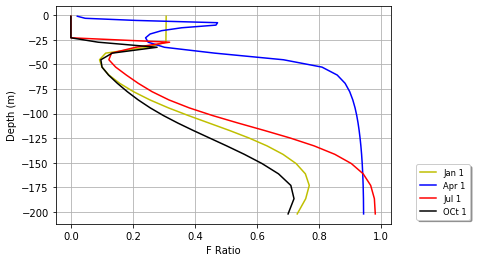

In [11]:
plt.plot(PE[-1,:,3,3],z_rho[-1,:,3,3],'y',label='Jan 1')
plt.plot(PE[182,:,3,3],z_rho[182,:,3,3],'b',label='Apr 1')
plt.plot(PE[365,:,3,3],z_rho[365,:,3,3],'r',label='Jul 1')
plt.plot(PE[545,:,3,3],z_rho[545,:,3,3],'k',label='OCt 1')

ax1=plt.gca()
#ax1.axis([4.285, 4.305, 0, 207])
#ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('F Ratio')
ax1.set_ylabel('Depth (m)');
ax1.legend(loc='lower right', shadow=True, fontsize='small', bbox_to_anchor=(1.25, 0.0));

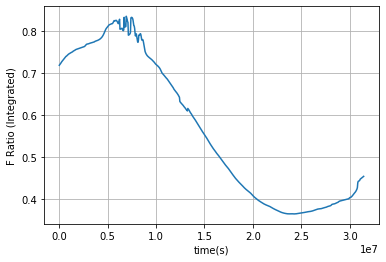

In [12]:
plt.plot(time,iPE[:,3,3])
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('F Ratio (Integrated)');

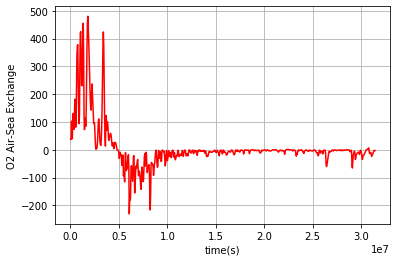

In [13]:
plt.plot(time,Oair[:,3,3],'r')
ax1=plt.gca()
#ax1.axis([4.285, 4.305, 0, 207])
#ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('O2 Air-Sea Exchange');

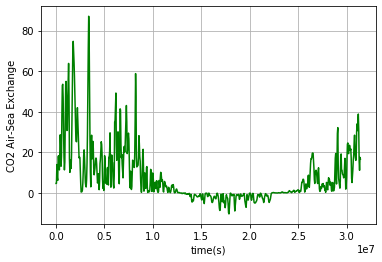

In [14]:
plt.plot(time,Cair[:,3,3],'g')
ax1=plt.gca()
#ax1.axis([4.285, 4.305, 0, 207])
#ax1.invert_yaxis()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('CO2 Air-Sea Exchange');

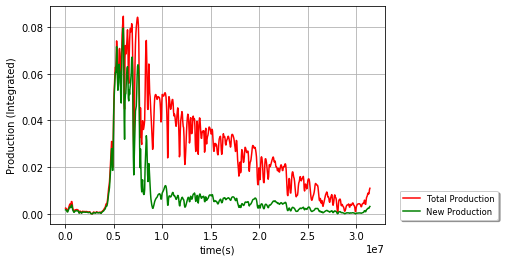

In [15]:
plt.plot(time,iPP[:,3,3],'r',label='Total Production')
plt.plot(time,iupt[:,3,3],'g',label='New Production')
ax1=plt.gca()
ax1.grid(b='True', which='major', axis='both')
ax1.set_xlabel('time(s)')
ax1.set_ylabel('Production (Integrated)');
ax1.legend(loc='lower right', shadow=True, fontsize='small', bbox_to_anchor=(1.35, 0.0));